## Introduction
This notebook will take you through the functionality available in the notebooks interface for kdb+. Above each group of cells is an explanation, some of the cells are intended to be run, others you will need to change before running them. 

### Running code
The cells below demonstrate the simplest case of running some code and getting a result. There are 3 things to note here:

- Each line of code which would produce output at a console produces output in the notebook.
- stderr/stdout are printed separately to the output in the usual way for notebooks, note that if your print statement such as `-1"hello world!"` has an output (here -1) then the output will be displayed, you can suppress this with a semicolon at the end of a statement as usual.
- Execution is 'script like', i.e. you can use the normal rules of indentation for functions, if/while blocks, and select/update/delete statements.

In [1]:
myvar:42                       / this statement has no output
myvar                          / will output the value of myvar
0N!myvar                       / will output the value of myvar and print it to stdout
-1"hello world!"               / will print hello world! and output -1
-1"hello quiet world";         / will print hello quiet world but not print anything to stdout

42


42


hello world!
hello quiet world


42


-1


In [2]:
/
indentation examples 
The usual rules of identation apply 
Also note this is a block comment, make sure there is just a single / at the start of the first line in this cell
\
func:{
 / this is a multiline function
 :1;
 }

/ define a table over multiple lines
tab:([]time:asc 10?.z.t;
       sym:10?`A`B`select;
       price:10+10?10f)
select from tab
t1:100#tab

/ now we can do a multiline select
select last time,avg price by sym
 from tab where sym in `A`B


time         sym    price   
----------------------------
00:34:28.887 A      13.92752
01:53:10.321 B      15.17091
05:15:26.418 select 15.1598 
07:57:14.764 select 14.06664
11:32:19.305 B      11.78084
11:37:56.091 A      13.01772
14:11:00.647 B      17.85033
14:52:59.840 select 15.3471 
15:59:34.638 A      17.11172
16:46:10.161 B      14.11597


sym| time         price   
---| ---------------------
A  | 15:59:34.638 14.68565
B  | 16:46:10.161 14.72951


### Code completion and getting help

The notebook supports code completion of q keywords and anything in the `.h`, `.Q`, `.z` and `.j` directories of q. 
Completion also works on user defined variables, provided they exist on the server. If you've defined variables in the *same* cell they won't exist yet in the server process before the cell is first executed, but notebooks will complete these for you locally.

Code completion in notebooks is accessed via the TAB key.

#### Completion

In [ ]:
sel      / q keywords, place your cursor anywhere in the word and hit tab
ma       / if you place your cursor in this word and hit TAB you should see a drop down with max, maxs and mavg.
select   / completion can replace existing text

Now lets define some variables in directories we can complete on, run the cell below and then try auto completion in the following cell.

In [6]:
.dict1.subdir1.foo:1
.dict1.subdir1.goo:2
.dict1.subdir2.foo:3
.dict1.subdir2.goo:4
.dict2.value:4


In [ ]:
.dict1.subdir1.f       / hit TAB to complete
.dict1.sub             / TAB here gives a list of subdirectories
/ and so on and so on....

#### Help
Help is available on q keywords and built in commands, embedPy and Python foreign objects, and user defined variables. For user defined variables the console representation along with datatype information is displayed.

In notebooks help is accessed with SHIFT+TAB, this should pop up a window in the notebook, to see an html version of the help with links to the online documentation for the function, hit SHIFT+TAB 4 times in succession (or use the buttons in the help window).


In [3]:
select time,sym,price from tab / place your cursor in the 'select' or 'tab' words here and hit SHIFT TAB
                               / if you try it in time,sym,price or from you will get "Sorry no help available" 

time         sym    price   
----------------------------
00:34:28.887 A      13.92752
01:53:10.321 B      15.17091
05:15:26.418 select 15.1598 
07:57:14.764 select 14.06664
11:32:19.305 B      11.78084
11:37:56.091 A      13.01772
14:11:00.647 B      17.85033
14:52:59.840 select 15.3471 
15:59:34.638 A      17.11172
16:46:10.161 B      14.11597


### Errors
Errors are displayed in red and fall into 2 classes

- Parse errors, parsing of the cell content is checked by the kernel before sending to the server for evaluation, the usual q parsing rules apply. Note that for foreign languages (lines preceded by `p)` for example) parsing is not checked.

- Evaulation (runtime errors), these are reported from the server, one important thing to note is that as with q scripts, lines up to where the error occurred will have been executed, e.g.
```
a:1
b:a+`
a:2
```

will result in a having a value of 1.


In [6]:
select from

[0;31mparse error[0m: [0;31mfrom[0m

In [6]:
f:{ / this function was not properly indented (on the last line)
 -1"hello world"
}

[0;31mparse error[0m: [0;31m{[0m

In [7]:
a:2

In [7]:
a:1    / run once to trigger an error, then execute next cell to see the value of a
b:a+`  

[0;31mtype[0m: [0;31mtype[0m

In [8]:
a

1


### System commands

System commands can be used with the `\` operator at the start of a line in a code cell.

**NOTE**: \d does not currently work.

In [ ]:
\ls
\p
\c 50 200

### Loading and saving code

In addition to loading code with `\l` , code from a script *on the server* can be loaded directly into a cell using a 'magic' command

```/%loadscript filename```

This will not attempt to execute the code and any code in the rest of the cell will not execute.``

In [ ]:
/ run the cell, the contents of matplot lib will be inserted in place
/%loadscript examples/importmatplotlib.q

```/%savescript filename [overwrite]```

Will save contents of the cell as a script, optionally overwriting the script if it already exists

In [ ]:
/ save the contents of the current cell as a script
/%savescript saveexample.q 0
aaa:1 2 3
bbb:3 4 5
func:{
 
 }
/ comments should be included in the file

### Python and inline display

Along with k and q code, python code can be run in a q process using embedPy, charts created using matplotlib will be displayed inline in the notebook.  The cells below demonstrate a couple of ways we can run python code. 

The first example uses the p) prefix to define and display a chart, using an example from the matplotlib website.


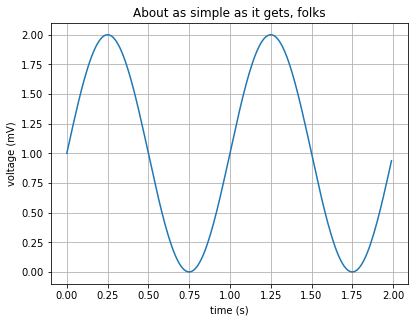

In [4]:
p)import matplotlib.pyplot as plt
p)import numpy as np
p)t = np.arange(0.0, 2.0, 0.01)
p)s = 1 + np.sin(2*np.pi*t)
p)plt.plot(t, s)

p)plt.xlabel('time (s)')

p)plt.ylabel('voltage (mV)')
p)plt.title('About as simple as it gets, folks')
p)plt.grid(True)

p)plt.show()

This cell demonstrates loading a python file which exists on the server and does exactly the same as the cell above. 

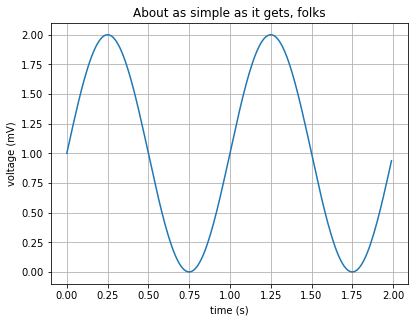

In [5]:

\l examples/matplotlibexample.p

Finally we have an example of a simple wrapper for matplotlib.pyplot written in q (in `matplotlib.q`) which lets us use pyplot methods and functions like q functions.


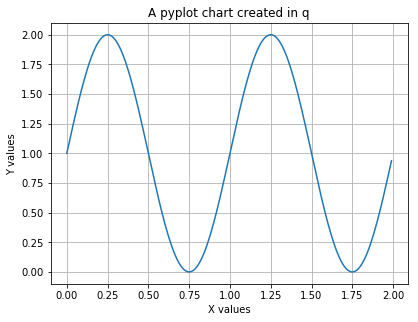

In [6]:
/ This is q code
\l examples/importmatplotlib.q
pi:2*asin 1
x:til[200]%100
y:1+sin 2*pi*x
plt:.matplotlib.pyplot[]
plt.
/\t plt:.p.module .p.import`matplotlib.pyplot
plt.plot[x;y];
plt.xlabel"X values";
plt.ylabel"Y values";
plt.title"A pyplot chart created in q";
plt.grid 1b;
plt.show[];